In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn import preprocessing
import umap
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [9]:
from sklearn.datasets import fetch_openml
from joblib import Memory
memory = Memory('../data/')
fetch_openml_cached = memory.cache(fetch_openml)
data = fetch_openml_cached('Fashion-MNIST', cache=True, as_frame=True)

In [10]:
D = data.data.copy().head(1000)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
DATA = D.copy()
DATA

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.005882,0.0,0.0,0.00000,0.000000,...,0.528889,0.515837,0.555556,0.317992,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.092827,...,0.000000,0.000000,0.004274,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.18232,0.405063,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.791111,0.000000,0.000000,0.012552,0.000000,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.080169,...,0.115556,0.058824,0.008547,0.100418,0.127572,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


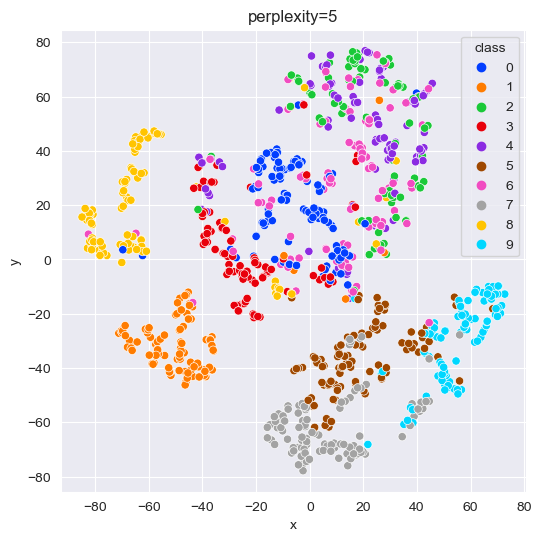

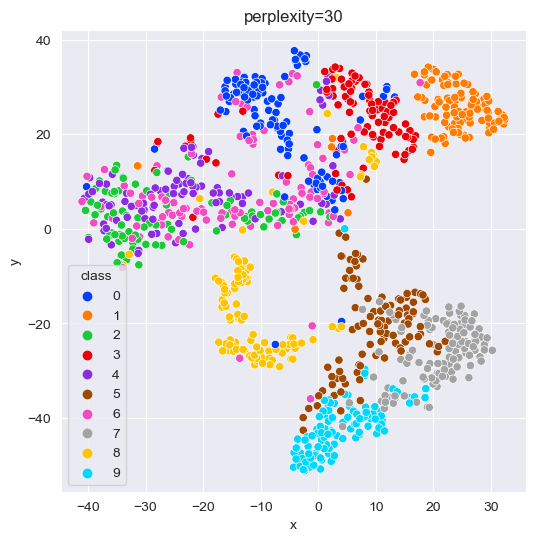

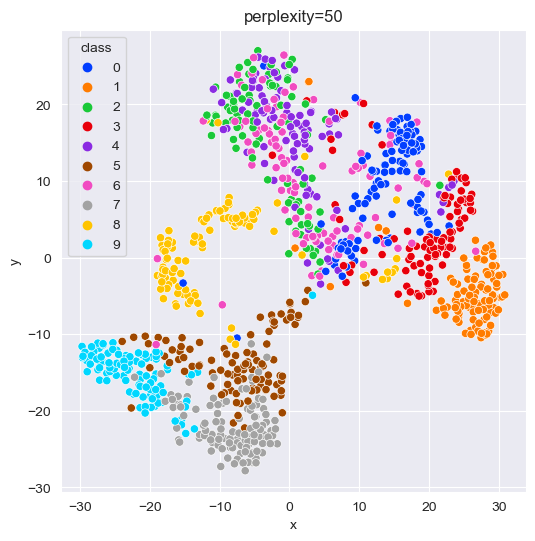

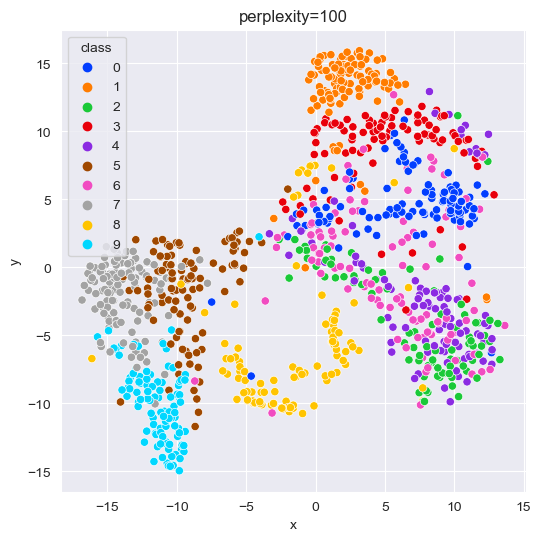

CPU times: total: 2min 26s
Wall time: 11.7 s


In [14]:
%%time
for index, i in enumerate([5, 30, 50, 100]):
    plt.figure(figsize=(6,6))
    T = TSNE(n_components=2, perplexity=i, random_state=123)
    TSNE_features = T.fit_transform(D)
    DATA['x'] = TSNE_features[:, 0]
    DATA['y'] = TSNE_features[:, 1]
    sns.scatterplot(x='x', y='y', hue=data.target.astype(int), data=DATA, palette='bright')\
        .set(title=f'perplexity={i}')
    plt.show()

n_neighbors=5, min_dist=0.1


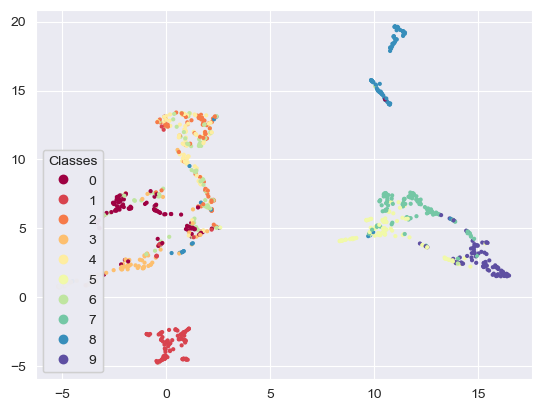

<Figure size 800x600 with 0 Axes>

n_neighbors=5, min_dist=0.6


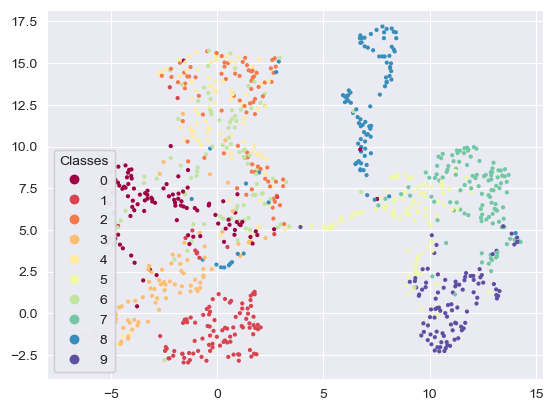

<Figure size 800x600 with 0 Axes>

n_neighbors=30, min_dist=0.1


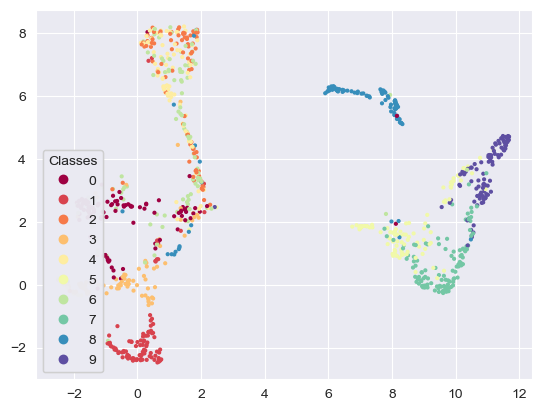

<Figure size 800x600 with 0 Axes>

n_neighbors=30, min_dist=0.6


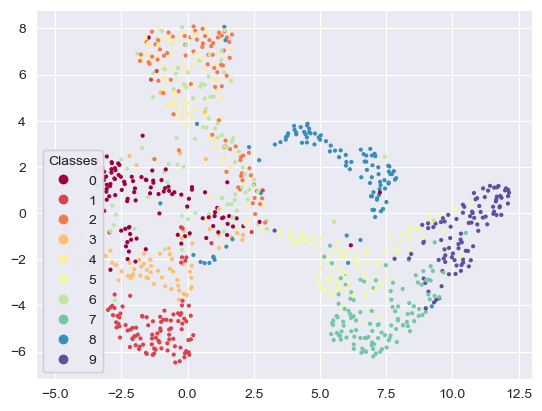

<Figure size 800x600 with 0 Axes>

n_neighbors=50, min_dist=0.1


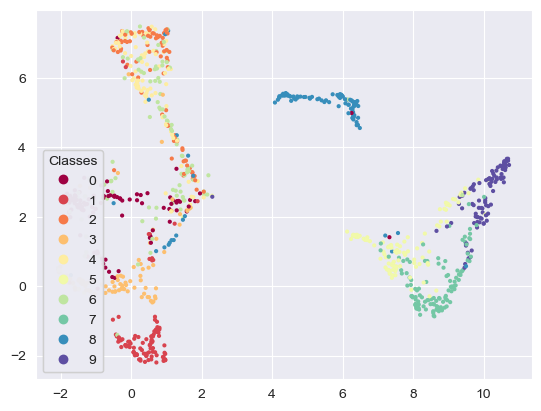

<Figure size 800x600 with 0 Axes>

n_neighbors=50, min_dist=0.6


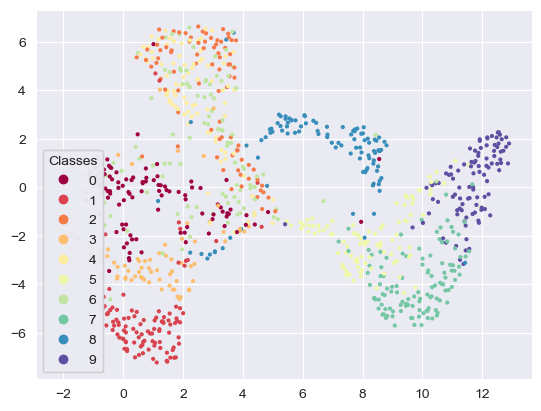

<Figure size 800x600 with 0 Axes>

n_neighbors=100, min_dist=0.1


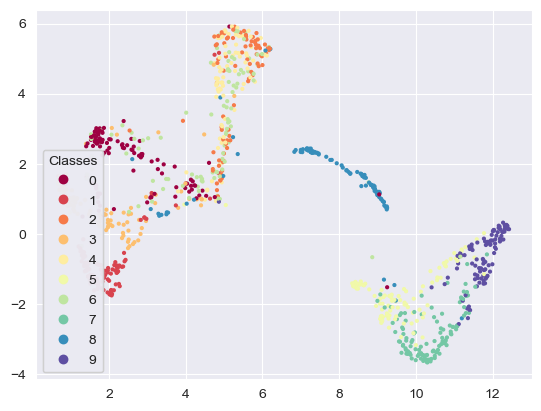

<Figure size 800x600 with 0 Axes>

n_neighbors=100, min_dist=0.6


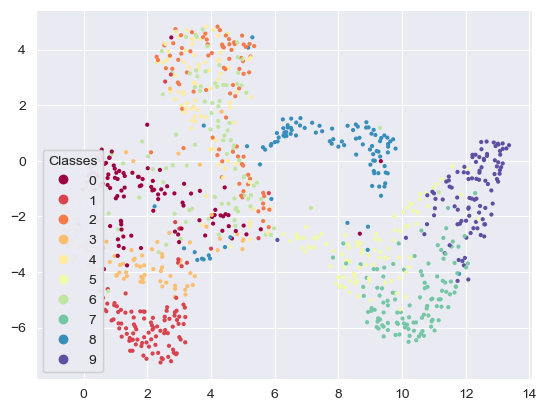

<Figure size 800x600 with 0 Axes>

CPU times: total: 21.8 s
Wall time: 21.5 s


In [12]:
%%time
n_n = (5, 30, 50, 100)
m_d = (0.1, 0.6)
um = dict()

for i in range(len(n_n)):
    for j in range(len(m_d)):
        fig, ax = plt.subplots()
        plt.figure(figsize=(8,6))
        print('n_neighbors=', n_n[i], ', min_dist=', m_d[j], sep='')
        um[(n_n[i], m_d[j])] = umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=45).fit_transform(DATA)
        scatter = ax.scatter(um[(n_n[i], m_d[j])][:, 0], um[(n_n[i], m_d[j])][:, 1], c=data.target.head(1000).astype(int), s=4, cmap='Spectral')
        legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
        ax.add_artist(legend1)
        plt.show()